In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
x_test.shape

(10000, 32, 32, 3)

In [29]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [30]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [31]:
def showImage(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[int(y[index])])

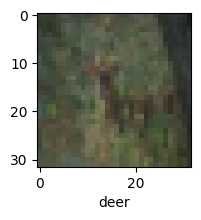

In [32]:
showImage(x_train, y_train, 10)

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [35]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [36]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3669 - accuracy: 0.5093 - val_loss: 1.1570 - val_accuracy: 0.5965
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9908 - accuracy: 0.6540 - val_loss: 0.9333 - val_accuracy: 0.6737
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8129 - accuracy: 0.7161 - val_loss: 0.8822 - val_accuracy: 0.6894
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6639 - accuracy: 0.7680 - val_loss: 0.8469 - val_accuracy: 0.7123
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5404 - accuracy: 0.8109 - val_loss: 0.8785 - val_accuracy: 0.7082
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4197 - accuracy: 0.8520 - val_loss: 0.9569 - val_accuracy: 0.7003
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3132 - accuracy: 0.8913 - val_loss: 1.0007 - val_ac

In [45]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(arr) for arr in y_pred]

313/313 [==============================] - 1s 4ms/step


In [46]:
y_tes = y_test.reshape(-1, )

In [47]:
y_pred[30]

6

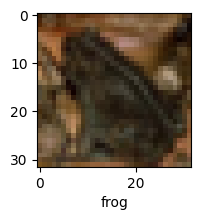

In [48]:
showImage(x_test, y_test, 30)

In [49]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 7.1052 - accuracy: 0.6759


[7.1051764488220215, 0.6758999824523926]

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.82      0.79      0.80      1000
           2       0.54      0.62      0.58      1000
           3       0.46      0.47      0.47      1000
           4       0.68      0.55      0.61      1000
           5       0.53      0.60      0.57      1000
           6       0.82      0.67      0.74      1000
           7       0.70      0.77      0.74      1000
           8       0.76      0.84      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[698,  17,  84,  32,  18,  11,   4,   9,  92,  35],
       [ 25, 787,  12,   9,   3,  12,  10,   2,  53,  87],
       [ 53,   7, 621,  82,  46,  84,  33,  50,  15,   9],
       [ 25,  10,  94, 471,  56, 209,  39,  52,  19,  25],
       [ 23,   5, 127,  91, 553,  56,  27,  98,  13,   7],
       [ 20,   7,  59, 165,  37, 605,  16,  75,  11,   5],
       [ 10,  16,  78,  85,  35,  63, 666,  15,  19,  13],
       [ 18,   4,  37,  41,  42,  66,   4, 773,   4,  11],
       [ 39,  28,  23,  18,   9,  12,   2,   8, 836,  25],
       [ 42,  84,  14,  19,   9,  14,   7,  19,  43, 749]])

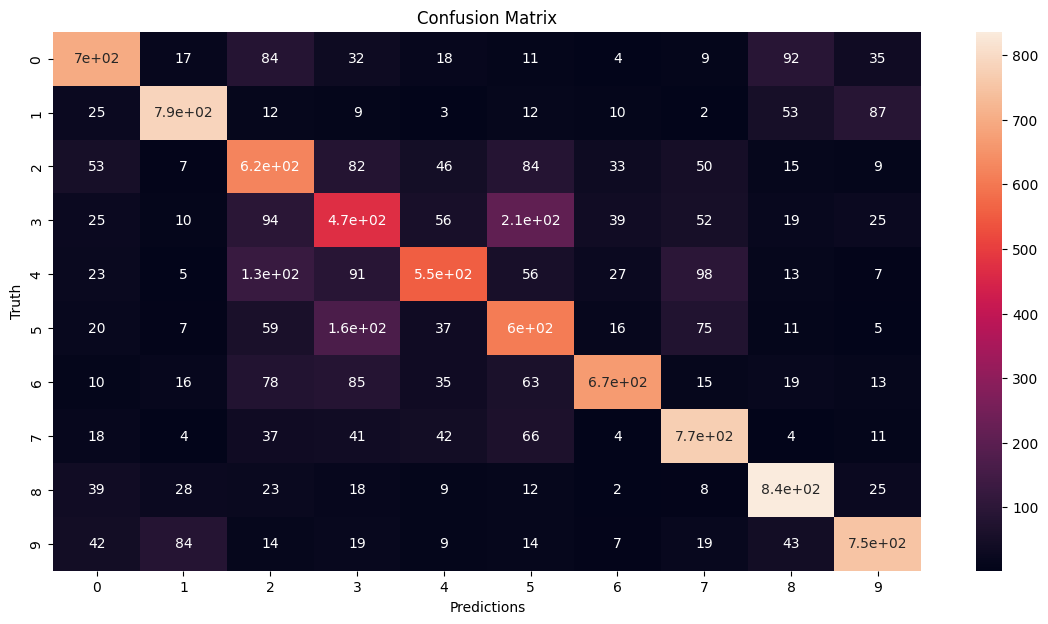

In [52]:
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()